In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [4]:
df = pd.read_csv("global_heat_index.csv")

In [5]:
df

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
...,...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211,0
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155,0
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434,0
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819,0


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['Solar Radiation (GHI)'], axis = 1)

In [10]:
Y = df['Solar Radiation (GHI)']

In [11]:
X

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177
...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819


In [12]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
17515    0
17516    0
17517    0
17518    0
17519    0
Name: Solar Radiation (GHI), Length: 17520, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
train_data = X_train.join(Y_train)

In [15]:
train_data

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
1010,2011,2,12,2,10,14.792512,981.883789,73.307202,140.568817,2.608501,0
6005,2011,9,8,5,24,26.001490,970.543396,93.035206,229.364838,4.698730,0
5789,2011,8,30,5,25,26.169543,973.627685,97.980139,72.990669,2.958741,0
2621,2011,4,20,5,1,23.538524,979.068237,23.814404,100.115051,3.735109,0
13044,2012,6,28,12,18,43.015837,972.877380,24.424759,240.572983,4.538062,950
...,...,...,...,...,...,...,...,...,...,...,...
9339,2012,1,25,3,0,9.593652,985.199951,53.130429,47.447174,3.066497,0
15859,2012,10,23,19,17,26.610849,984.118042,56.362887,40.972878,1.453925,0
15427,2012,10,5,19,19,27.991298,980.127625,59.443350,219.798615,2.279171,0
14654,2012,9,3,14,26,32.337249,972.381165,71.016072,61.770943,1.007889,796


<Axes: >

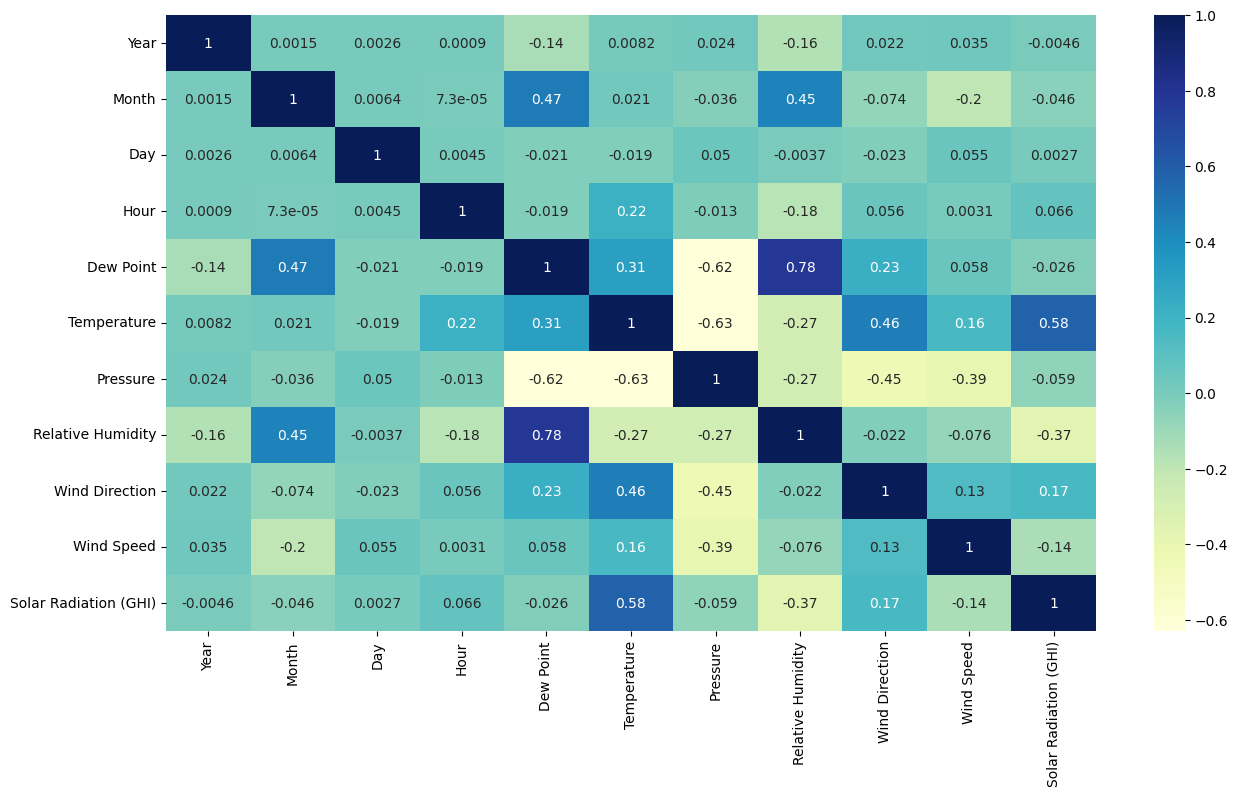

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")